## Ejercicio manejo de datos y Limpieza

 - Importa los datos de FIFA.csv, Contienen información de jugadores de futbol
 - Realiza una limpieza de datos:
   - ¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?
   - Cambia las medidas de las variables Weight y Height a Kg y cm
   - Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...
   - Arregla también las variables W/F, SM, IR
   - Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.
   - También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...
 - Tratamiento de valores nulos:
   - Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas
   - Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...
 - Valores extremos
   - Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos
   - Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.
 - Análisis descriptivo
   - Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido
   - Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente.
   - OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?

### Exploración

In [4]:
import pandas as pd

In [5]:
df_fifa = pd.read_csv('/content/fifa.csv')
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,1954,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,2225,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,1959,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,9815,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,10074,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [6]:
df_fifa.Height

,Height
0,"5'9"""
1,"6'0"""
2,"5'4"""
3,"5'10"""
4,"5'11"""
...,...
13695,"5'8"""
13696,"6'5"""
13697,"5'7"""
13698,"5'11"""


In [7]:
df_fifa.columns[3:]

Index(['Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LA

In [8]:
df_fifa[['W/F', 'SM', 'A/W', 'D/W', 'IR','Value', 'Wage']]

,W/F,SM,A/W,D/W,IR,Value,Wage
0,4 ★,2★,High,Medium,1 ★,€525K,€4K
1,3 ★,4★,High,Low,2 ★,€8.5M,€23K
2,4 ★,4★,High,Medium,2 ★,€9M,€49K
3,2 ★,2★,Medium,Medium,1 ★,€275K,€4K
4,2 ★,3★,Low,Medium,1 ★,€725K,€2K
...,...,...,...,...,...,...,...
13695,3 ★,2★,High,Medium,1 ★,€325K,€1K
13696,2 ★,1★,Medium,Medium,1 ★,€190K,€700
13697,4 ★,4★,High,Medium,2 ★,€8M,€9K
13698,3 ★,2★,Medium,Medium,1 ★,€140K,€4K


### Limpieza

¿De qué formato son nuestras variables? ¿cuántas líneas y columnas tiene el dataset?

In [9]:
df_fifa.shape

(13700, 102)

In [10]:
df_fifa.dtypes

# Descarga del archivo completo

#tipos = df_fifa.dtypes.reset_index()
#tipos.columns = ['Columna', 'Tipo']
#tipos.to_csv('tipos_datos.csv', index=False)

,0
Unnamed: 0,int64
ID,int64
Name,object
Age,int64
Nationality,object
...,...
CB,object
RCB,object
RB,object
GK,object


Cambia las medidas de las variables Weight y Height a Kg y cm

In [11]:
#display(df_fifa[["Height", "Weight"]])

# Libras a kilos
df_fifa["Weight_kg"] = (df_fifa["Weight"].str.replace("lbs", "").astype(float) * 0.45359237).round(2)

# Pies a cm
def pies_a_cm(height_str):

    # Separar pies y pulgadas
    pies, pulgadas = height_str.replace('"', '').split("'")

    # Convertir a números
    pies = float(pies)
    pulgadas = float(pulgadas)

    # Convertir a cm (1 pie = 30.48 cm, 1 pulgada = 2.54 cm)
    cm = (pies * 30.48) + (pulgadas * 2.54)

    return round(cm, 2)

df_fifa["Height_cm"] = df_fifa["Height"].apply(pies_a_cm)

display(df_fifa[["Weight", "Weight_kg", "Height", "Height_cm"]])

,Weight,Weight_kg,Height,Height_cm
0,161lbs,73.03,"5'9""",175.26
1,159lbs,72.12,"6'0""",182.88
2,134lbs,60.78,"5'4""",162.56
3,152lbs,68.95,"5'10""",177.80
4,150lbs,68.04,"5'11""",180.34
...,...,...,...,...
13695,143lbs,64.86,"5'8""",172.72
13696,176lbs,79.83,"6'5""",195.58
13697,146lbs,66.22,"5'7""",170.18
13698,176lbs,79.83,"5'11""",180.34


Elimina el "+1", "+2"... de las variables CDM, RDM... y todas las columnas que están al final, sin tener que ir una por una. Apóyate en métodos como split, replace...

In [12]:
#display(df_fifa.iloc[:, -31:-4])

def quitar_bonus(stat_str):
    try:
        if pd.isna(stat_str):
            return None
        if "+" not in str(stat_str):
            return int(stat_str)
        troncal, bonus = str(stat_str).split("+")
        return int(troncal)
    except:
        return None

for columna in df_fifa.iloc[:, -31:-4].columns:
    df_fifa[columna] = df_fifa[columna].apply(quitar_bonus)

display(df_fifa.iloc[:, -31:-4])

,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,3.0,58,58,58,61,62,62,62,61,63,...,59,59,59,59,59,58,54,54,54,58
1,44.0,77,77,77,77,77,77,77,77,76,...,57,53,53,53,57,53,48,48,48,53
2,73.0,73,73,73,80,79,79,79,80,80,...,59,56,56,56,59,53,41,41,41,53
3,7.0,50,50,50,51,51,51,51,51,53,...,56,58,58,58,56,57,58,58,58,57
4,4.0,56,56,56,59,59,59,59,59,61,...,64,64,64,64,64,63,61,61,61,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,4.0,44,44,44,51,48,48,48,51,48,...,58,52,52,52,58,58,54,54,54,58
13696,3.0,22,22,22,20,22,22,22,20,23,...,20,23,23,23,20,20,22,22,22,20
13697,15.0,67,67,67,74,73,73,73,74,76,...,62,60,60,60,62,57,47,47,47,57
13698,4.0,55,55,55,56,55,55,55,56,57,...,60,62,62,62,60,60,63,63,63,60


Arregla también las variables W/F, SM, IR

In [13]:
try:
    df_fifa[['W/F', 'SM', 'IR']] = df_fifa[['W/F', 'SM', 'IR']].apply(lambda x: x.str.replace(' ', '', regex=False))
    df_fifa[['W/F', 'SM', 'IR']] = df_fifa[['W/F', 'SM', 'IR']].apply(lambda x: x.str.replace('★', '', regex=False)).astype(int)
except:
    None
df_fifa[['W/F', 'SM', 'IR']]

,W/F,SM,IR
0,4,2,1
1,3,4,2
2,4,4,2
3,2,2,1
4,2,3,1
...,...,...,...
13695,3,2,1
13696,2,1,1
13697,4,4,2
13698,3,2,1


Para posteriormente hacer un buen análisis de datos por posición del jugador sería recomendable agrupar o normalizar las posiciones (BP, Best Position) en Portero, Defensa, Mediocampista y delantero. Quizás lo mejor sería crear una función posiciones_jugadores y dependiendo de la BP de cada uno que la nueva variable tome uno de esos 4 valores.

In [14]:
print(df_fifa["BP"].unique())

def normalizar_posicion(pos):
    defensas = ['RB', 'CB', 'LB']
    mediocampistas = ['CM', 'CAM', 'CDM', 'LM', 'RM', 'LWB', 'RWB']
    delanteros = ['ST', 'RW', 'LW', 'CF']

    if pos == "GK":
        return "Portero"
    elif pos in defensas:
        return "Defensa"
    elif pos in mediocampistas:
        return "Mediocampista"
    elif pos in delanteros:
        return "Delantero"
    else:
        return None

df_fifa["BP"] = df_fifa["BP"].apply(normalizar_posicion)
df_fifa["BP"]

['CM' 'ST' 'CAM' 'CDM' 'LM' 'RB' 'CB' 'RM' 'GK' 'LB' 'RW' 'LWB' 'LW' 'RWB'
 'CF']


,BP
0,Mediocampista
1,Delantero
2,Mediocampista
3,Mediocampista
4,Mediocampista
...,...
13695,Defensa
13696,Portero
13697,Mediocampista
13698,Mediocampista


También vamos a querer calcular algunas métricas sobre el valor de los jugadores, Transforma las variables Value y Wage de manera que sea un entero y podamos calcular la suma y la media por equipo, posición, nacionalidad...

In [15]:
display(df_fifa[["Value", "Wage"]].dtypes)
df_fifa[["Value", "Wage"]].head()

,0
Value,object
Wage,object


,Value,Wage
0,€525K,€4K
1,€8.5M,€23K
2,€9M,€49K
3,€275K,€4K
4,€725K,€2K


In [16]:
def convertir_a_unidades(num_str):

    num_str = num_str.replace("€", "")

    try:
        if "K" in num_str:
            return int(float(num_str.replace("K", "")) * 1000)
        elif "M" in num_str:
            return int(float(num_str.replace("M", "")) * 1000000)
        else:
            return int(float(num_str))
    except:
        return None

df_fifa[["Value", "Wage"]] = df_fifa[["Value", "Wage"]].apply(lambda x: x.apply(convertir_a_unidades))
df_fifa[["Value", "Wage"]]

,Value,Wage
0,525000,4000
1,8500000,23000
2,9000000,49000
3,275000,4000
4,725000,2000
...,...,...
13695,325000,1000
13696,190000,700
13697,8000000,9000
13698,140000,4000


### Tratamiento de nulos

Localiza las variables que tienen valores nulos y cuenta cuántos tiene cada una de ellas.

In [17]:
# Check for missing values in the DataFrame
missing_values = pd.isnull(df_fifa)

# Count missing values in each column
missing_counts = missing_values.sum()

# Columnas con valores nulos y cuenta
missing_counts[missing_counts > 0]

,0
Club,21
Position,343
Joined,44
Loan Date End,12961
Volleys,44
Curve,44
Agility,44
Balance,44
Jumping,44
Interceptions,7


Decide qué hacer con ellos, si eliminarlos, imputarles un valor fijo, imputarles un valor en función de alguna condición...

In [18]:
# Eliminamos aquellos que no tiene sentido analizar
df_fifa.dropna(subset=["Volleys", "Curve", "Agility", "Balance", "Jumping", "Interceptions", "Positioning", "Vision", "Composure", "Sliding Tackle", "A/W", "D/W", "Hits"], how="all", inplace=True)

# Sustitución por valor fijo
df_fifa["Club"] = df_fifa["Club"].fillna("Agente libre")

# Imputación de valores medios, basados en la posición del jugador
df_fifa.fillna(df_fifa.groupby("BP")[["Volleys", "Curve", "Agility", "Balance", "Jumping", "Interceptions", "Positioning", "Vision", "Composure", "Sliding Tackle", "Hits"]].transform("mean"), inplace=True)

# Imputación de moda, en campos cualitativos
df_fifa.fillna(df_fifa.groupby("BP")[["A/W", "D/W"]].transform(lambda x: x.mode().iloc[0]), inplace=True)

# Dejamos varios campos con nulos, ya que no son relevantes: Position, Joined, Loan Date End

# Check for missing values in the DataFrame
missing_values = pd.isnull(df_fifa)

# Count missing values in each column
missing_counts = missing_values.sum()

# Columnas con valores nulos y cuenta
missing_counts[missing_counts > 0]

,0
Position,343
Joined,44
Loan Date End,12961


### Gestión de valores extremos

Localiza si las variables numéricas toman valores demasiado elevados o bajos, usa la función describe y pinta gráficos.

In [19]:
df_fifa.describe()

,Unnamed: 0,ID,Age,Growth,Value,Wage,Attacking,Crossing,Finishing,Heading Accuracy,...,RDM,RWB,LB,LCB,CB,RCB,RB,OVA,Weight_kg,Height_cm
count,13700.000000,13700.000000,13700.000000,13700.000000,1.370000e+04,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,...,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,8561.641971,219378.929708,25.286058,5.509927,2.549592e+06,10442.233577,258.313431,51.585766,47.996934,53.460292,...,54.702263,55.108540,54.302044,53.154672,53.154672,53.154672,54.302044,66.945912,75.133339,181.225848
std,4954.144383,37445.343736,4.944498,5.797176,5.294546e+06,21054.511967,72.412379,17.899930,19.411530,17.010578,...,13.515860,13.287836,13.572940,14.603391,14.603391,14.603391,13.572940,6.860189,7.171942,6.893956
min,1.000000,16.000000,16.000000,-1.000000,0.000000e+00,0.000000,33.000000,6.000000,3.000000,5.000000,...,16.000000,14.000000,14.000000,16.000000,16.000000,16.000000,14.000000,38.000000,53.070000,154.940000
25%,4269.750000,203979.750000,21.000000,0.000000,3.750000e+05,1000.000000,231.000000,41.000000,33.000000,45.000000,...,47.000000,49.000000,47.000000,43.000000,43.000000,43.000000,47.000000,62.000000,69.850000,175.260000
50%,8555.500000,228927.000000,25.000000,4.000000,8.000000e+05,3000.000000,271.000000,56.000000,52.000000,56.000000,...,57.000000,57.000000,57.000000,55.000000,55.000000,55.000000,57.000000,67.000000,74.840000,180.340000
75%,12887.250000,244043.500000,29.000000,9.000000,2.400000e+06,10000.000000,306.000000,65.000000,64.000000,65.000000,...,65.000000,64.000000,64.000000,65.000000,65.000000,65.000000,64.000000,72.000000,79.830000,185.420000
max,17122.000000,259091.000000,47.000000,26.000000,9.000000e+07,560000.000000,437.000000,94.000000,95.000000,93.000000,...,86.000000,86.000000,83.000000,88.000000,88.000000,88.000000,83.000000,93.000000,110.220000,205.740000


In [20]:
df_fifa.columns[3:]

Index(['Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Growth',
       ...
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'OVA', 'Weight_kg',
       'Height_cm'],
      dtype='object', length=101)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

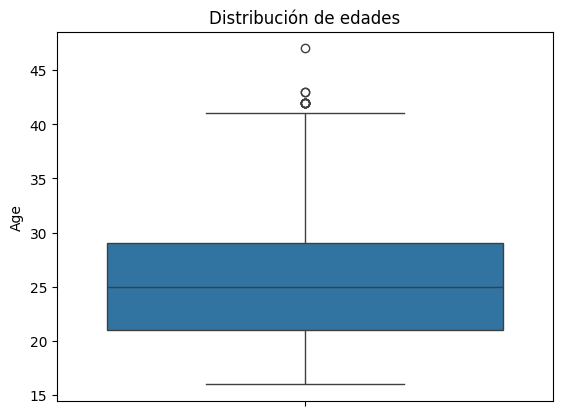

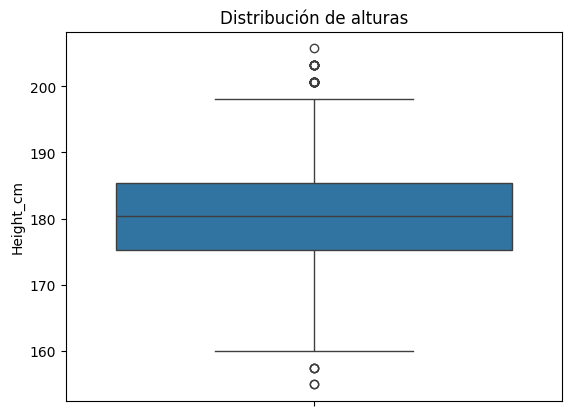

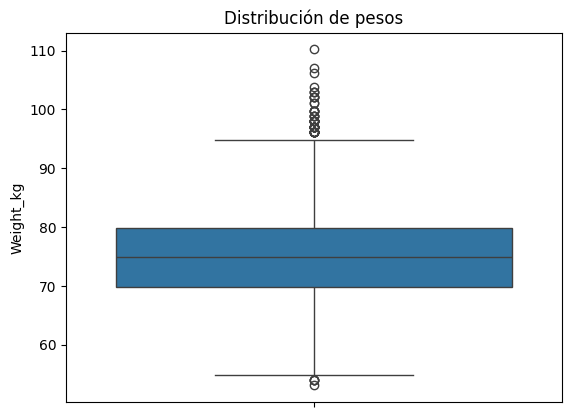

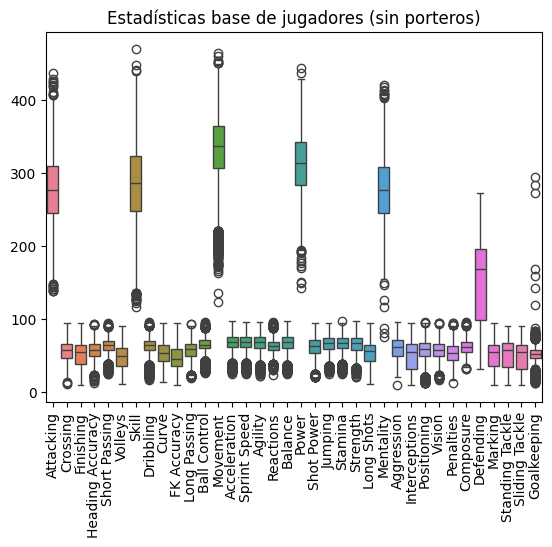

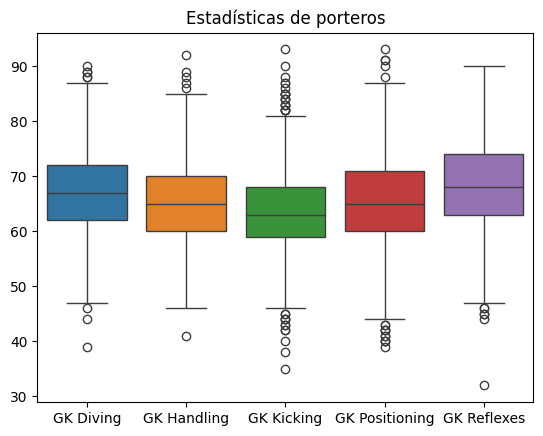

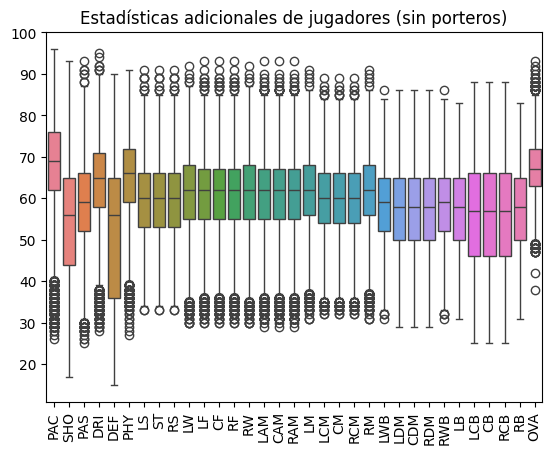

In [22]:
# Columnas: ['Age', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
#       'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End',
#       'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing',
#       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
#       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
#       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
#       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
#       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
#       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
#       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
#       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
#       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC',
#       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF',
#       'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
#       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK',
#       'OVA']

# Age
sns.boxplot(data=df_fifa["Age"])
plt.title('Distribución de edades')
plt.show()

# Height
sns.boxplot(data=df_fifa["Height_cm"])
plt.title('Distribución de alturas')
plt.show()

# Weight
sns.boxplot(data=df_fifa["Weight_kg"])
plt.title('Distribución de pesos')
plt.show()

# Base stats
df_jugadores = df_fifa[df_fifa["BP"] != "Portero"]  #sin porteros
sns.boxplot(data=df_jugadores[['Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping']])
plt.title('Estadísticas base de jugadores (sin porteros)')
plt.xticks(rotation=90)
plt.show()

# Goalkeeping stats
df_porteros = df_fifa[df_fifa["BP"] == "Portero"]
sns.boxplot(data=df_porteros[['GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']])
plt.title('Estadísticas de porteros')
plt.show()

# Additional stats
sns.boxplot(data=df_jugadores[['PAC',
       'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'LS', 'ST', 'RS', 'LW', 'LF',
       'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM',
       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'OVA']])
plt.title('Estadísticas adicionales de jugadores (sin porteros)')
plt.xticks(rotation=90)
plt.show()

Si existe alguno que sea absurdo (por ejemplo una altura en negativo) corrígelo. Si no, trátalo de la manera que más nos convenga para un futuro análisis exploratorio, por ejemplo limítalo a un valor más bajo.

In [23]:
# Hay valores extremos pero no absurdos

### Análisis descriptivo

Una vez tenemos nuestros datos limpios de irregularidades, de valores nulos y erróneos podemos emepezar a analizar su contenido.


Compara las variables numéricas en función de variables categóricas, como su posición. Respóndete a preguntas tales como qué jugadores son más caros, más altos... Para ello representa una tabla con la suma, la media y la cuenta para cada posición. También dibuja un gráfico que consideres el más conveniente para analizar la misma información visualmente.


Qué jugadores son más altos?



Height_cm      
                     mean count
BP                             
Defensa        183.447541  4010
Delantero      181.865913  2655
Mediocampista  177.704209  5754
Portero        188.763044  1281

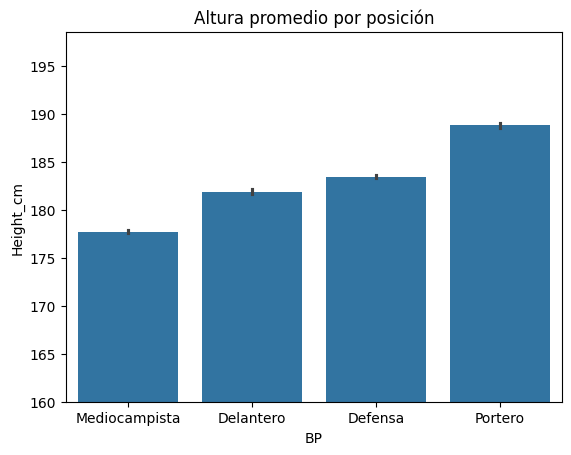


Qué jugadores son más pesados?



Weight_kg      
                    mean count
BP                            
Defensa        77.059509  4010
Delantero      76.172313  2655
Mediocampista  71.740419  5754
Portero        82.190679  1281

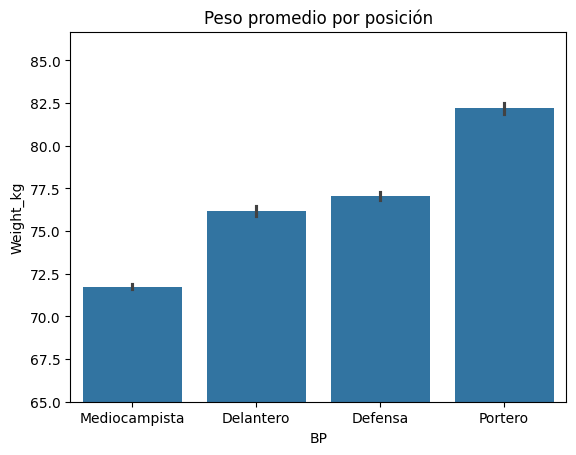


Qué posiciones son más caras en promedio?



Value      
                       mean count
BP                               
Defensa        2.229172e+06  4010
Delantero      2.617962e+06  2655
Mediocampista  2.790980e+06  5754
Portero        2.326656e+06  1281

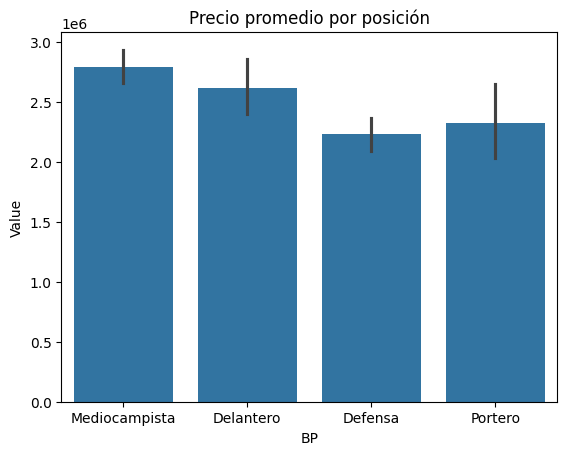


Qué habilidad tiene más impacto en el precio?



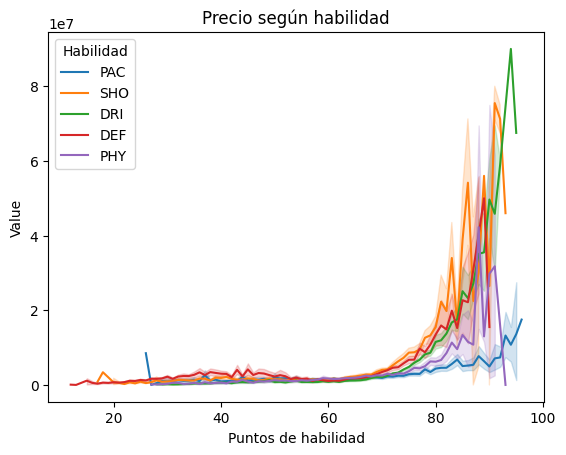

In [29]:
# Análisis de alturas por posición
print("\nQué jugadores son más altos?\n")
display(df_fifa.groupby("BP").agg({"Height_cm":["mean", "count"]}))
sns.barplot(x = "BP", y = "Height_cm", data=df_fifa)
plt.ylim(bottom=160)
plt.title('Altura promedio por posición')
plt.show()

# Análisis de pesos por posición
print("\nQué jugadores son más pesados?\n")
display(df_fifa.groupby("BP").agg({"Weight_kg":["mean", "count"]}))
sns.barplot(x = "BP", y = "Weight_kg", data=df_fifa)
plt.ylim(bottom=65)
plt.title('Peso promedio por posición')
plt.show()

# Análisis de precio por posición
print("\nQué posiciones son más caras en promedio?\n")
display(df_fifa.groupby("BP").agg({"Value":["mean", "count"]}))
sns.barplot(x = "BP", y = "Value", data=df_fifa)
#plt.ylim(bottom=65)
plt.title('Precio promedio por posición')
plt.show()

# Análisis de precio por skill
# Estadísticas principales: PAC,SHO,PAS,DRI,DEF,PHY
print("\nQué habilidad tiene más impacto en el precio?\n")
df_melted = df_fifa[["Value", "PAC", "SHO", "DRI", "DEF", "PHY"]].melt(id_vars=["Value"],
                                                  var_name="Habilidad",
                                                  value_name="Puntos de habilidad")
sns.lineplot(data=df_melted, x="Puntos de habilidad", y="Value", hue="Habilidad")
plt.title('Precio según habilidad')
plt.show()



OVA representa una valoración general del jugador, analiza si tiene alguna relación con otras columnas referentes a la calidad como Attacking, Defending... A mayor OVA mayor Value?